## **Sentimen Analisis Review GetContact Play Store**

Analisis sentimen adalah salah satu cabang penting dalam pemrosesan bahasa alami yang memungkinkan kita untuk secara otomatis mengidentifikasi apakah ulasan pengguna cenderung positif atau negatif. Dengan demikian, proyek ini akan membantu kita dalam memahami umpan balik pengguna dengan lebih baik, dan dapat digunakan untuk mengambil keputusan yang lebih baik dalam pengembangan dan perbaikan aplikasi.

## Import Library

Pada bagian ini, berbagai pustaka Python diimpor untuk mendukung proses analisis sentimen. Mulai dari:

- **Manipulasi data**: seperti `pandas` dan `numpy`
- **Visualisasi**: seperti `matplotlib`, `seaborn`, dan `wordcloud`
- **Pemrosesan teks**: seperti `nltk` dan `Sastrawi` untuk preprocessing bahasa Indonesia
- **Machine Learning**: seperti `scikit-learn` untuk model SVM & Random Forest
- **Deep Learning**: seperti `TensorFlow` untuk membangun model LSTM
- Beberapa konfigurasi tambahan juga disiapkan, seperti pengunduhan stopwords dan penonaktifan warning sistem.

In [1]:
# Instalasi pustaka yang dibutuhkan
!pip install Sastrawi

# Pustaka untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Pemrosesan teks
import re
import string
import json
import requests
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download as nltk_unduh
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Mengunduh dependensi NLTK
nltk_unduh('punkt')
nltk_unduh('punkt_tab')
nltk_unduh('stopwords')

# Pustaka untuk pembelajaran mesin
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Pustaka untuk pembelajaran mendalam
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, GRU, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Menonaktifkan peringatan sistem
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Dataset

Dataset hasil scraping yang berisi ulasan pengguna aplikasi **GetContact** dibaca menggunakan `pandas`. Data ini digunakan sebagai bahan utama untuk proses analisis sentimen, yang berisi teks ulasan yang nantinya akan diproses dan dianalisis lebih lanjut.

In [2]:
file_path = "ulasan_GetContact.csv"
df = pd.read_csv(file_path)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a2c54f9a-91c8-4323-93a1-3f931470c749,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa sih setelah ada premium mau scroll pesa...,1,41,8.2.0,2025-04-09 03:54:35,"Halo, Mohon maaf atas ketidaknyamanannya. Sila...",2025-03-18 06:10:56,8.2.0
1,5bf291c5-34c3-47a8-89e6-54440001d615,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mau verifikasi aja susah, pas pengetikan nomor...",1,1218,8.2.0,2025-03-13 13:13:01,"Halo, Mohon maaf atas ketidaknyamanannya. Sila...",2025-03-13 14:28:51,8.2.0
2,09b48ecb-4b9c-453f-a7c6-be823bbfa0f0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi bobrok gak jelas bgt, anda ini bikin ...",1,414,8.2.0,2025-03-18 22:21:45,"Halo, Jika Anda kesulitan mendapatkan kode ver...",2025-03-19 08:31:53,8.2.0
3,f151df74-3b39-4ee3-920c-5ef01f857acd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat bagus, namun ada bug pada saat verifika...",5,1321,8.1.0,2025-02-12 03:35:04,NaN,NaN,8.1.0
4,353fe522-5a16-4c32-896e-e419df5f2d59,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekrang kok ngebug ya. Mau login susah banget....,2,114,8.1.0,2025-02-15 11:45:20,"Halo,Kami ingin melihat situasi yang Anda alam...",2025-02-15 18:31:39,8.1.0


**Menampilkan Informasi Data dan Cleaning Data**

In [3]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  35010 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          25260 non-null  object
 9   repliedAt             25260 non-null  object
 10  appVersion            35010 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


In [4]:
# Cek jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()
print("Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: {jumlah_duplikat}


In [5]:
# cek missing value
print("Missing value tiap kolom:")
print(df.isnull().sum())

Missing value tiap kolom:
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    14990
at                          0
replyContent            24740
repliedAt               24740
appVersion              14990
dtype: int64


In [6]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
df = df.dropna()

In [7]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16504 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16504 non-null  object
 1   userName              16504 non-null  object
 2   userImage             16504 non-null  object
 3   content               16504 non-null  object
 4   score                 16504 non-null  int64 
 5   thumbsUpCount         16504 non-null  int64 
 6   reviewCreatedVersion  16504 non-null  object
 7   at                    16504 non-null  object
 8   replyContent          16504 non-null  object
 9   repliedAt             16504 non-null  object
 10  appVersion            16504 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.5+ MB


## Text Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [8]:
# Fungsi untuk membersihkan teks ulasan aplikasi
def proses_teks(teks):
    teks = re.sub(r'@[A-Za-z0-9_]+', '', teks)
    teks = re.sub(r'#[A-Za-z0-9_]+', '', teks)
    teks = re.sub(r'[²]', ' ', teks)
    teks = re.sub(r'\d+', ' ', teks)
    teks = re.sub(r'[^\w\s]', ' ', teks)
    teks = teks.strip()
    teks = teks.lower()
    return teks

# Fungsi untuk memecah teks menjadi kata-kata (token)
def tokenisasi_teks(teks):
    teks = word_tokenize(teks)  # Mengubah teks menjadi list token
    return teks

# Fungsi untuk menghapus stopwords dari list token
def filter_stopwords(teks):
    # Memuat stopwords Bahasa Indonesia dan Inggris
    daftar_stopwords = set(stopwords.words('indonesian'))
    daftar_stopwords_english = set(stopwords.words('english'))

    # Menggabungkan stopwords Bahasa Indonesia dan Inggris
    daftar_stopwords.update(daftar_stopwords_english)

    # Menambahkan stopwords tambahan (umum dalam bahasa informal)
    daftar_stopwords.update([
        'di', 'ini', 'dan', 'lagi', 'itu', 'ke', 'apa', 'nya', 'sih', 'deh', 'kok', 'dong', 'nih', 'kan', 'dan', 'yang'
        'duh', 'b', 'aja', 'btw'

    ])

    # Memfilter token yang bukan stopwords
    hasil_filter = [kata for kata in teks if kata not in daftar_stopwords]

    return hasil_filter


# Fungsi untuk memuat daftar kata slang dari file JSON online
def muat_kata_slang(url):
    return requests.get(url).json()

# URL raw GitHub yang berisi kamus kata slang
url = "https://raw.githubusercontent.com/azzhrdania/Proyek-Analisis-Sentimen-Gojek/refs/heads/main/Datasets/slangwords.json"

# Muat kamus slang ke dalam variabel
kata_slang = muat_kata_slang(url)

# Fungsi untuk mengganti kata slang dalam teks menjadi bentuk baku
def perbaiki_kata_slang(teks):
    kata_kata = teks.split()  # Pisahkan teks menjadi kata-kata
    kata_diperbaiki = [
        kata_slang[kata.lower()] if kata.lower() in kata_slang else kata
        for kata in kata_kata
    ]
    return ' '.join(kata_diperbaiki)

# Menggabungkan daftar token menjadi satu kalimat
def gabungkan_ke_kalimat(tokens):
    return ' '.join(tokens)

# Bersihkan teks dan simpan hasilnya di kolom 'clean_text'
df['clean_text'] = df['content'].apply(proses_teks) # Changed 'bersihkan_teks' to 'proses_teks'

# Ganti kata slang dengan kata standar dan simpan di 'text_slangwords'
df['text_slangwords'] = df['clean_text'].apply(perbaiki_kata_slang)

# Tokenisasi teks (pisah menjadi kata-kata) dan simpan di 'text_tokenizing'
df['text_tokenizing'] = df['text_slangwords'].apply(tokenisasi_teks)

# Hapus stopwords (kata umum) dan simpan hasilnya di 'text_stopword'
df['text_stopword'] = df['text_tokenizing'].apply(filter_stopwords)

# Gabungkan token menjadi kalimat dan simpan di 'clean_content'
df['clean_content'] = df['text_stopword'].apply(gabungkan_ke_kalimat)

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

**Memuat Leksikon Sentimen (Positive & Negative Word Lists)**


Pada tahap ini, dilakukan pengambilan *lexicon list* berbahasa Indonesia dari repositori online yang berisi kumpulan kata positif dan negatif. Lexicon ini digunakan untuk pendekatan *lexicon-based sentiment analysis*, di mana sentimen suatu kalimat dapat dianalisis berdasarkan jumlah kata bernuansa positif atau negatif yang muncul.

Fungsi `ambil_lexikon()` digunakan untuk mengakses URL dan memuat kata-kata ke dalam struktur `set` agar lebih cepat saat pencocokan. Kemudian data dari URL dimasukkan ke dalam dua variabel, `lexikon_positif` dan `lexikon_negatif`.

Langkah ini penting untuk mendukung metode analisis sentimen tanpa menggunakan pembelajaran mesin (machine learning), khususnya pada tahap awal atau baseline analisis.


In [9]:
# mengambil data lexsikon
def mengambil_lexikon(url):
    return set(k.strip() for k in requests.get(url).text.splitlines() if k.strip())

# memuat lexsikon kata positif
url_positif = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt"
lexikon_positif = mengambil_lexikon(url_positif)

# memmuat lexsikon kata negatif
url_negatif = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt"
lexikon_negatif = mengambil_lexikon(url_negatif)

**Menentukan Label Sentimen Ulasan Berdasarkan Lexsikon**

Pada tahap ini, dilakukan proses penentuan sentimen (positif, negatif, atau netral) terhadap setiap ulasan berdasarkan pendekatan *lexicon-based*. Fungsi `tentukan_sentimen()` menghitung skor sentimen dari setiap kata dalam teks yang telah diproses:

- Skor akan bertambah jika ditemukan kata yang termasuk dalam leksikon positif.
- Skor akan berkurang jika ditemukan kata yang termasuk dalam leksikon negatif.
- Hasil akhir ditentukan sebagai:
  - **Positif**, jika skor > 0
  - **Negatif**, jika skor < 0
  - **Netral**, jika skor = 0

Kemudian, hasil skor dan label sentimen disimpan dalam dua kolom baru, yaitu `sentimen_skor` dan `sentimen`. Distribusi dari label sentimen ditampilkan menggunakan fungsi `value_counts()`.


In [10]:
def tentukan_sentimen(teks):
    skor = 0
    for kata in teks:
        if kata in lexikon_positif:
            skor += 1
        if kata in lexikon_negatif:
            skor -= 1

    if skor > 0:
        sentimen = 'positif'
    elif skor < 0:
        sentimen = 'negatif'
    else:
        sentimen = 'netral'

    return skor, sentimen

hasil_sentimen = df['text_stopword'].apply(tentukan_sentimen)
hasil_sentimen = list(zip(*hasil_sentimen))
df['sentimen_skor'] = hasil_sentimen[0]
df['sentimen'] = hasil_sentimen[1]
print(df['sentimen'].value_counts())

sentimen
netral     8442
negatif    5052
positif    3010
Name: count, dtype: int64


**Visualisasi Distribusi Sentimen Ulasan GetContact**

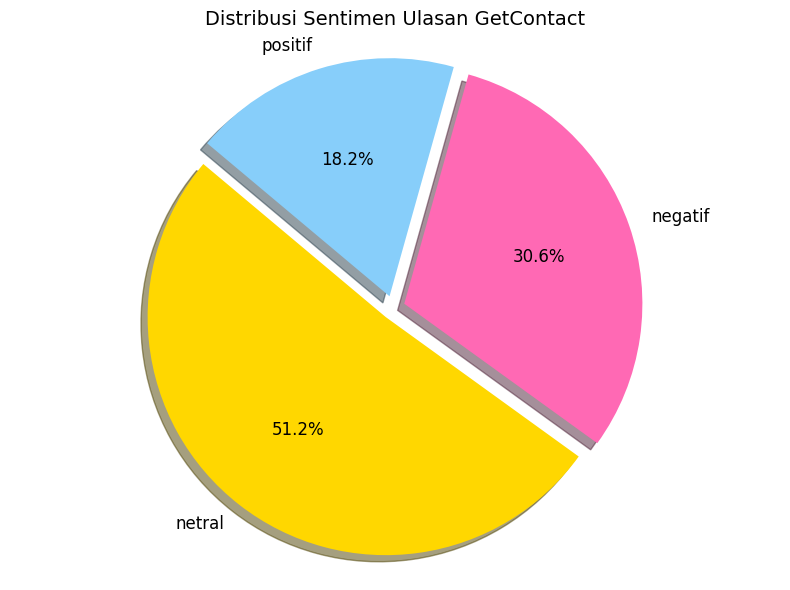

In [11]:
# Hitung jumlah setiap kategori sentimen
jumlah_sentimen = df['sentimen'].value_counts()

warna = ["#FFD700", "#FF69B4", "#87CEFA"]
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0.05, 0.05, 0.05)
ax.pie(
    jumlah_sentimen,
    labels=jumlah_sentimen.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=warna,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
)

ax.set_title('Distribusi Sentimen Ulasan GetContact', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Visualisasi Histogram Skor Sentimen**

Histogram di bawah ini menunjukkan distribusi nilai skor sentimen dari setiap ulasan. Semakin tinggi skor positif, maka semakin banyak kata positif dalam ulasan tersebut.Sebaliknya, skor negatif mencerminkan dominasi kata negatif. Distribusi ini membantu memahami kecenderungan emosi dalam ulasan yang dianalisis.


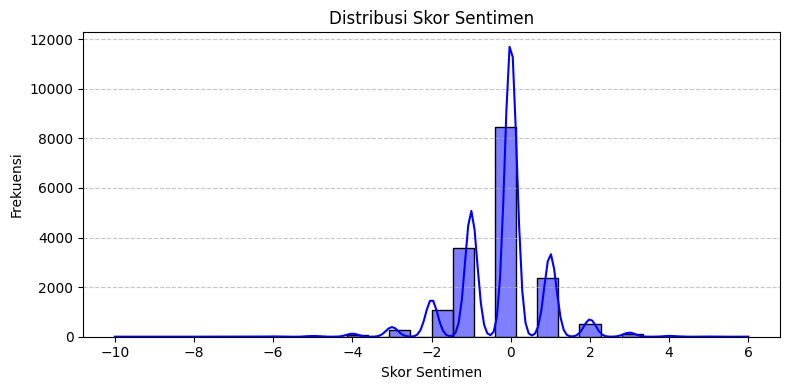

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['sentimen_skor'], bins=30, kde=True, color='blue')
plt.title('Distribusi Skor Sentimen')
plt.xlabel('Skor Sentimen')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi histogram skor sentimen yang kamu tampilkan:

- **Sebagian besar ulasan berada di sekitar skor 0**, yang berarti **banyak ulasan bersifat netral** atau memiliki jumlah kata positif dan negatif yang seimbang.
- Terlihat ada **puncak tinggi di skor 0 dan -1**, yang menandakan:
  - Skor **0** → ulasan netral, atau tidak banyak mengandung kata dalam leksikon.
  - Skor **-1 hingga -2** → menunjukkan cukup banyak ulasan yang cenderung **negatif ringan**.
- Distribusinya **tidak simetris** – bagian negatif (kiri) tampak **lebih dominan** dibandingkan bagian positif (kanan), menandakan:
  - **Ulasan negatif sedikit lebih banyak dibanding ulasan positif.**
- Sebagian besar skor berada dalam rentang **-4 sampai +3**, jadi mayoritas ulasan **tidak terlalu ekstrem** (tidak terlalu positif atau negatif sekali).

**Menentukan Fitur dan Label untuk Pelatihan Model**

Pada tahap ini, kolom `clean_content` digunakan sebagai fitur (X) karena sudah melalui proses pembersihan teks.  
Sementara itu, kolom `sentimen` digunakan sebagai label (y) dan dikonversi ke bentuk numerik:
- `positif` → 2  
- `netral` → 1  
- `negatif` → 0  
Langkah ini penting agar model machine learning dapat mengenali label dalam bentuk angka.


In [13]:
fitur = df['clean_content']
label = df['sentimen'].map({'positif': 2, 'netral': 1, 'negatif': 0})

## **Feature Engineering**

**Vektorisasi Teks Menggunakan TF-IDF**

Pada tahap ini, teks yang telah dibersihkan dikonversi menjadi representasi numerik menggunakan teknik **TF-IDF (Term Frequency–Inverse Document Frequency)**.  
TF-IDF akan memberi bobot lebih tinggi pada kata-kata yang unik di setiap dokumen, dan menurunkan bobot untuk kata-kata yang sering muncul di seluruh dokumen.

- `TfidfVectorizer(max_features=10000)` digunakan untuk mengambil maksimal 10.000 fitur/kata yang paling penting.
- Hasil transformasi berupa matriks vektor dengan dimensi (jumlah data, jumlah fitur terpilih).

Langkah ini penting agar model pembelajaran mesin bisa "membaca" dan mempelajari pola dari teks ulasan.


In [14]:
# Transformasi teks ke vektor angka menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
fitur_tfidf = tfidf.fit_transform(fitur)

# Menampilkan dimensi data hasil vektorisasi
print(f"Dimensi fitur TF-IDF: {fitur_tfidf.shape}")

Dimensi fitur TF-IDF: (16504, 10000)


**Praprocessing Teks untuk Model LSTM**

Agar teks ulasan dapat diproses oleh model LSTM (Long Short-Term Memory), teks perlu dikonversi menjadi format numerik yang sesuai, yaitu urutan angka yang merepresentasikan kata.

Tahapan preprocessing untuk LSTM:

- **Tokenizer** diinisialisasi dan dibatasi hingga 10.000 kata paling sering muncul.
- Tokenizer **fit** ke data teks untuk membuat kamus (word index).
- Setiap ulasan kemudian diubah menjadi **urutan angka** berdasarkan kamus tersebut.
- Panjang urutan diseragamkan menggunakan **padding**, di mana setiap teks dipotong atau ditambahkan nol hingga memiliki panjang yang sama, yaitu **100 kata**.

Langkah ini penting agar data input ke model LSTM memiliki bentuk yang konsisten.


In [15]:
# Menginisialisasi tokenizer dan membatasi jumlah kata unik0
tokenizer = Tokenizer(num_words=10000)

# Menyesuaikan tokenizer dengan teks yang sudah dibersihkan
tokenizer.fit_on_texts(fitur)

# Mengubah teks menjadi urutan angka berdasarkan kamus tokenizer
fitur_sekuensial = tokenizer.texts_to_sequences(fitur)

# Menyamakan panjang urutan dengan padding
fitur_padat = pad_sequences(fitur_sekuensial, maxlen=100)

**Menampilkan Statistik Data untuk Pelatihan Model**

In [16]:
# hitung jumlah kelas sentimen
jumlah_kelas_sentimen = len(np.unique(label))
print(f"Jumlah kelas sentimen: {jumlah_kelas_sentimen}")

# Menampilkan dimensi dari fitur hasil padding
print(f"Dimensi urutan fitur: {fitur_padat.shape}")

# Menampilkan ukuran kosa kata dari tokenizer
kosa_kata_index = tokenizer.word_index
print(f"\nBanyak ukuran kosa kata: {len(kosa_kata_index)} kata")

Jumlah kelas sentimen: 3
Dimensi urutan fitur: (16504, 100)

Banyak ukuran kosa kata: 10372 kata


## Model Training & Evaluation

## **Deep Learning Model (LSTM)**

**Membagi Dataset untuk Pelatihan, Validasi, dan Pengujian**


Pada tahap ini, dataset dibagi menjadi tiga bagian:

- **70% untuk data pelatihan**: digunakan untuk melatih model.
- **10% (diambil dari 70%) sebagai data validasi**: untuk memantau performa model selama pelatihan dan menghindari overfitting.
- **20% sebagai data pengujian**: untuk mengevaluasi kinerja akhir dari model setelah pelatihan.

Pembagian ini dilakukan menggunakan fungsi `train_test_split` dari `sklearn`.

In [17]:
# Membagi data menjadi: pelatihan (70%), pengujian (20%), dan validasi (10%)
fitur_latih_lstm, fitur_uji_lstm, label_latih_lstm, label_uji_lstm = train_test_split(
    fitur_padat, label, test_size=0.2, random_state=42
)

fitur_latih_lstm, fitur_validasi_lstm, label_latih_lstm, label_validasi_lstm = train_test_split(
    fitur_latih_lstm, label_latih_lstm, test_size=0.125, random_state=42
)

# Menampilkan jumlah sampel di tiap subset
print("Jumlah sampel tiap subset:")
print(f"Set pelatihan: {fitur_latih_lstm.shape[0]} sampel")
print(f"Set validasi : {fitur_validasi_lstm.shape[0]} sampel")
print(f"Set pengujian: {fitur_uji_lstm.shape[0]} sampel")

Jumlah sampel tiap subset:
Set pelatihan: 11552 sampel
Set validasi : 1651 sampel
Set pengujian: 3301 sampel


**Membangun dan Melatih Model LSTM untuk Klasifikasi Sentimen**


Model LSTM dibangun menggunakan arsitektur sebagai berikut:

- `Embedding`: Mengubah kata menjadi representasi vektor berdimensi 128.
- `SpatialDropout1D`: Digunakan untuk regularisasi dan mengurangi overfitting.
- `LSTM`: Layer utama untuk menangkap hubungan sekuensial antar kata.
- `Dense` dengan `softmax`: Untuk klasifikasi ke 3 kelas (negatif, netral, positif).

Model disusun menggunakan fungsi loss `sparse_categorical_crossentropy` dan optimizer `Adam`. Untuk mengontrol pelatihan digunakan dua callback:

- `EarlyStopping`: Menghentikan pelatihan jika performa validasi tidak membaik.
- `ReduceLROnPlateau`: Menurunkan learning rate secara otomatis jika performa validasi stagnan.

In [18]:
# membuat model LSTM
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    SpatialDropout1D(0.4),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(3, activation='softmax')
])

# menyusun model dengan loss dan optimizer
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# callback untuk mengontrol pelatihan
callback_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
callback_lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2
)

callbacks = [callback_early_stopping, callback_lr_reduction]

# Menjalankan pelatihan model
riwayat_latihan = model_lstm.fit(
    fitur_latih_lstm, label_latih_lstm,
    validation_data=(fitur_validasi_lstm, label_validasi_lstm),
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 63s 299ms/step - accuracy: 0.5605 - loss: 0.9231 - val_accuracy: 0.8534 - val_loss: 0.4117 - learning_rate: 0.0010
Epoch 2/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.8742 - loss: 0.3478 - val_accuracy: 0.9285 - val_loss: 0.2225 - learning_rate: 0.0010
Epoch 3/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 79s 298ms/step - accuracy: 0.9460 - loss: 0.1672 - val_accuracy: 0.9497 - val_loss: 0.1715 - learning_rate: 0.0010
Epoch 4/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.9701 - loss: 0.0987 - val_accuracy: 0.9534 - val_loss: 0.1899 - learning_rate: 0.0010
Epoch 5/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 84s 309ms/step - accuracy: 0.9804 - loss: 0.0636 - val_accuracy: 0.9649 - val_loss: 0.1465 - learning_rate: 0.0010
Epoch 6/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.9861 - loss: 0.0412 - val_accuracy: 0.9570 - val_loss: 0.1669 - learning_rate: 0.0010
Epoch 7/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 55s 305ms/step - accuracy: 0.9

**Evaluasi dan Visualisasi Performa Model LSTM**

Setelah pelatihan selesai, dilakukan evaluasi terhadap:

- **Akurasi pelatihan** di epoch terakhir.
- **Akurasi pengujian** pada data uji.

Dilakukan juga:

- **Prediksi terhadap data uji.**
- **Perhitungan metrik evaluasi** seperti precision, recall, dan f1-score menggunakan `classification_report`.
- **Visualisasi** perkembangan loss dan akurasi pada data pelatihan dan validasi selama epoch berlangsung.

---

104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9601 - loss: 0.1460

Evaluasi Model LSTM
Akurasi pelatihan per epoch terakhir: 0.9923
Akurasi pengujian akhir: 0.9540
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step

Laporan Klasifikasi tiap label:
              precision    recall  f1-score   support

     negatif       0.98      0.93      0.95      1019
      netral       0.94      0.97      0.96      1712
     positif       0.94      0.94      0.94       570

    accuracy                           0.95      3301
   macro avg       0.96      0.95      0.95      3301
weighted avg       0.95      0.95      0.95      3301



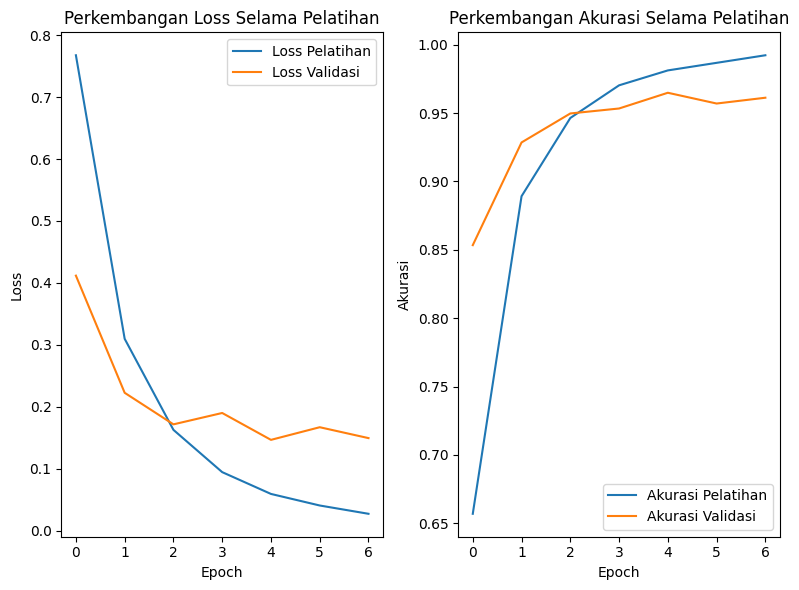

In [19]:
# mengambil nilai akurasi terakhir
akurasi_latih = riwayat_latihan.history['accuracy']

# mengevaluasi data pengujian
kerugian_uji, akurasi_lstm = model_lstm.evaluate(fitur_uji_lstm, label_uji_lstm)

# menampilkan hasil evaluasi
print("\nEvaluasi Model LSTM")
print(f"Akurasi pelatihan per epoch terakhir: {akurasi_latih[-1]:.4f}")
print(f"Akurasi pengujian akhir: {akurasi_lstm:.4f}")

# Prediksi terhadap data uji
y_prediksi = np.argmax(model_lstm.predict(fitur_uji_lstm), axis=1)

# laporan klasifikasi berdasarkan label
print("\nLaporan Klasifikasi tiap label:")
print(classification_report(label_uji_lstm, y_prediksi, target_names=['negatif', 'netral', 'positif']))
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(riwayat_latihan.history['loss'], label='Loss Pelatihan')
plt.plot(riwayat_latihan.history['val_loss'], label='Loss Validasi')
plt.title('Perkembangan Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(riwayat_latihan.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(riwayat_latihan.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perkembangan Akurasi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

**Visualisasi Confusion Matrix Model LSTM**

Confusion matrix digunakan untuk melihat performa klasifikasi model terhadap masing-masing label (negatif, netral, positif).

- Matriks ditampilkan dalam bentuk **heatmap**.
- Membantu melihat **kesalahan model** saat memprediksi suatu kelas.

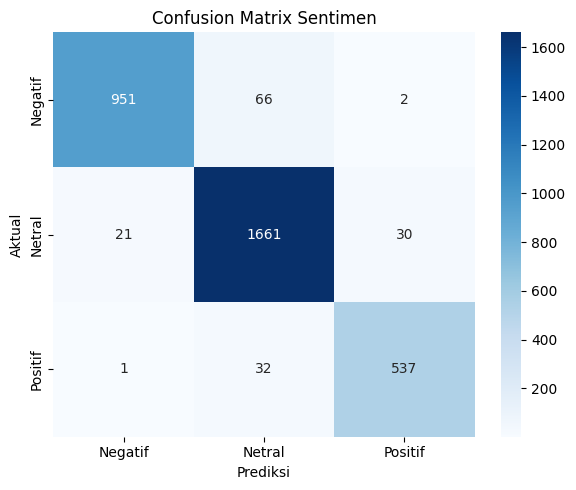

In [20]:
# membuat confusion matrix
matriks_konfusi = confusion_matrix(label_uji_lstm, y_prediksi)

# menentukan label kelas
label_kategori = ['Negatif', 'Netral', 'Positif']

# menampilkan visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(matriks_konfusi, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_kategori, yticklabels=label_kategori)
plt.title('Confusion Matrix Sentimen')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

**Menghitung Akurasi, Precision, Recall, dan F1-score dari Confusion Matrix**

Perhitungan metrik dilakukan secara manual untuk masing-masing kelas berdasarkan confusion matrix:

- **Precision**: Proporsi prediksi benar terhadap total prediksi kelas tersebut.
- **Recall**: Proporsi prediksi benar terhadap total data aktual kelas tersebut.
- **F1-score**: Rata-rata harmonik dari precision dan recall.
- **Akurasi total**: Jumlah prediksi benar dibagi total seluruh prediksi.

In [21]:
# mengmbil nilai dari confusion matrix
TN, FP, FN, TP = None, None, None, None
# mengambil nilai matrix
cm = confusion_matrix(label_uji_lstm, y_prediksi)
print("Confusion Matrix:")
print(cm)

# mengitung metrik per kelas
for i, kelas in enumerate(['Negatif', 'Netral', 'Positif']):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\nKelas {kelas}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

# menhitung akurasi keseluruhan
akurasi_total = np.trace(cm) / np.sum(cm)
print(f"\nAkurasi Keseluruhan: {akurasi_total:.4f}")

Confusion Matrix:
[[ 951   66    2]
 [  21 1661   30]
 [   1   32  537]]

Kelas Negatif
  Precision: 0.9774
  Recall:    0.9333
  F1-score:  0.9548

Kelas Netral
  Precision: 0.9443
  Recall:    0.9702
  F1-score:  0.9571

Kelas Positif
  Precision: 0.9438
  Recall:    0.9421
  F1-score:  0.9429

Akurasi Keseluruhan: 0.9540


##**Traditional Machine Learning Models**

**Membagi Data Pelatihan dan Pengujian**

In [22]:
X_latih_svm, X_uji_svm, y_latih_svm, y_uji_svm = train_test_split(fitur_tfidf, label, test_size=0.2, random_state=42)

print("Jumlah Sampel tiap subset:")
print(f"Set pelatihan: {X_latih_svm.shape[0]} sampel")
print(f"Set pengujian: {X_uji_svm.shape[0]} sampel")

Jumlah Sampel tiap subset:
Set pelatihan: 13203 sampel
Set pengujian: 3301 sampel


**Pelatihan dan Prediksi Model SVM**

- Dataset dibagi menjadi **80% pelatihan** dan **20% pengujian**.
- Data diubah menjadi fitur TF-IDF sebagai input ke model.
- Model yang digunakan adalah **Support Vector Machine (SVM)** dengan kernel linear.
- Setelah pelatihan, model diuji dan hasil dievaluasi menggunakan:
  - **Akurasi**
  - **Classification report**
  - **Visualisasi confusion matrix**

In [23]:
model_svm = SVC(kernel='linear', probability=True)

# melatih model
model_svm.fit(X_latih_svm, y_latih_svm)

# melakukan Prediksi
y_pred_svm = model_svm.predict(X_uji_svm)

**Evaluasi Model SVM Berbasis TF-IDF**


Evaluasi Model SVM + TF-IDF

Akurasi Latih: 0.9656
Akurasi Uji: 0.9243

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.97      0.88      0.93      1019
      netral       0.90      0.97      0.93      1712
     positif       0.94      0.86      0.90       570

    accuracy                           0.92      3301
   macro avg       0.94      0.91      0.92      3301
weighted avg       0.93      0.92      0.92      3301



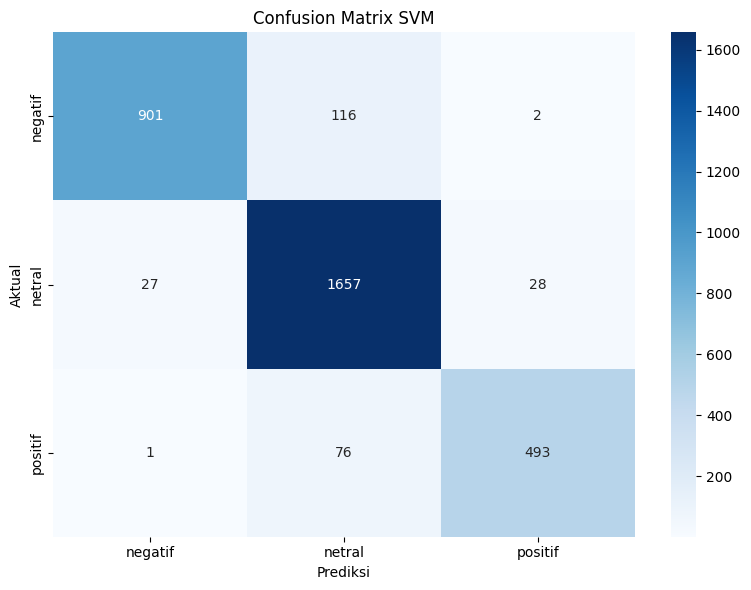

In [24]:
akurasi_latih_svm = accuracy_score(y_latih_svm, model_svm.predict(X_latih_svm))
akurasi_svm = accuracy_score(y_uji_svm, y_pred_svm)

print("\nEvaluasi Model SVM + TF-IDF")
print(f'\nAkurasi Latih: {akurasi_latih_svm:.4f}')
print(f'Akurasi Uji: {akurasi_svm:.4f}')

print("\nLaporan Klasifikasi:")
print(classification_report(y_uji_svm, y_pred_svm, target_names=['negatif', 'netral', 'positif']))

# visualisasi
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_uji_svm, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title('Confusion Matrix SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

## **Random Forest + TF-IDF (70/30)**

**Membagi Data Pelatihan dan Pengujian**

In [25]:
# Bagi Data menjadi Set Latih dan Set Uji (70% Latih, 30% Uji)
X_latih_rf, X_uji_rf, y_latih_rf, y_uji_rf = train_test_split(fitur_tfidf, label, test_size=0.3, random_state=42)

print("Jumlah Sampel: ")
print(f"Set Latih: {X_latih_rf.shape[0]} sampel")
print(f"Set Uji: {X_uji_rf.shape[0]} sampel")


Jumlah Sampel: 
Set Latih: 11552 sampel
Set Uji: 4952 sampel


**Inisialisasi dan Pelatihan Model Random Forest untuk Klasifikasi Sentimen**

- Dataset dibagi menjadi **70% pelatihan** dan **30% pengujian**.
- Data diubah menggunakan representasi TF-IDF.
- Model yang digunakan adalah **Random Forest Classifier** dengan parameter:
  - `n_estimators=300`
  - `min_samples_split=5`
  - `min_samples_leaf=2`
- Evaluasi dilakukan dengan:
  - **Akurasi pada data latih dan uji**
  - **Classification report**
  - **Visualisasi confusion matrix**

In [26]:
# Inisialisasi Model Random Forest dengan Penyesuaian Hyperparameter
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Latih Model
rf_model.fit(X_latih_rf, y_latih_rf)

# Lakukan Prediksi
y_pred_rf = rf_model.predict(X_uji_rf)

**Evaluasi Model Random Forest dengan Representasi TF-IDF**


Evaluasi Model Random Forest dengan TF-IDF
Akurasi Latih: 0.9027
Akurasi Uji: 0.8465

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.87      0.85      0.86      1537
      netral       0.83      0.89      0.86      2532
     positif       0.86      0.69      0.77       883

    accuracy                           0.85      4952
   macro avg       0.85      0.81      0.83      4952
weighted avg       0.85      0.85      0.84      4952



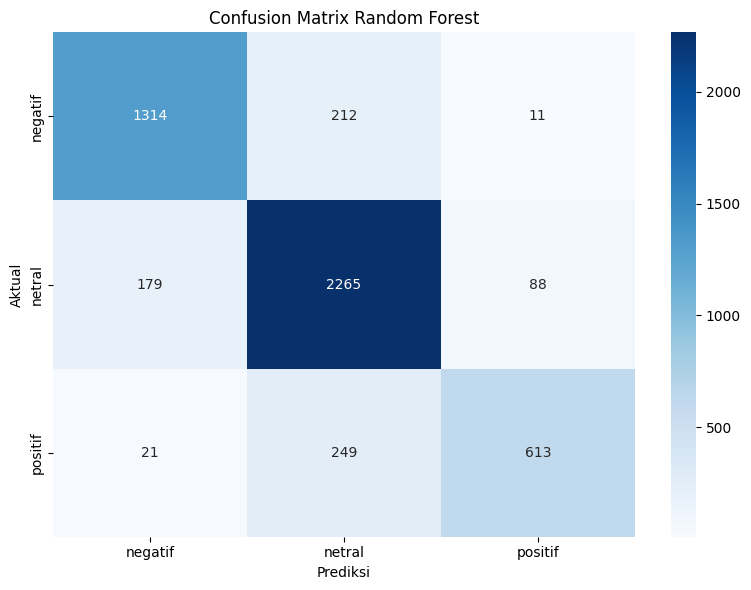

In [27]:
# Evaluasi Model
akurat_latih = accuracy_score(y_latih_rf, rf_model.predict(X_latih_rf))
akurat_uji_rf = accuracy_score(y_uji_rf, y_pred_rf)

print("\nEvaluasi Model Random Forest dengan TF-IDF")
print(f"Akurasi Latih: {akurat_latih:.4f}")
print(f"Akurasi Uji: {akurat_uji_rf:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_uji_rf, y_pred_rf, target_names=['negatif', 'netral', 'positif']))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_uji_rf, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

**Hyperparameter Tuning untuk Random Forest**

- Menggunakan **RandomizedSearchCV** untuk mencari kombinasi parameter terbaik pada Random Forest:
  - Dicoba berbagai nilai `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, dan `max_features`.
- Dilakukan cross-validation untuk mendapatkan model terbaik (`best_rf`).
- Model terbaik kemudian diuji ulang pada data uji untuk mendapatkan performa optimal.


In [28]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_latih_rf, y_latih_rf)

best_rf = rand_search.best_estimator_


Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [29]:
y_pred_rf = best_rf.predict(X_uji_rf)

print("Akurasi Uji:", accuracy_score(y_uji_rf, y_pred_rf))
print("\nLaporan Klasifikasi:")
print(classification_report(y_uji_rf, y_pred_rf, target_names=['negatif', 'netral', 'positif']))


Akurasi Uji: 0.8655088852988692

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.86      0.88      0.87      1537
      netral       0.89      0.86      0.88      2532
     positif       0.81      0.85      0.83       883

    accuracy                           0.87      4952
   macro avg       0.85      0.86      0.86      4952
weighted avg       0.87      0.87      0.87      4952



## **Perbandingan Performa Model**

In [30]:
# hasil akurasi Random Forest terbaru (setelah tuning)
akurasi_rf_tuned = accuracy_score(y_uji_rf, best_rf.predict(X_uji_rf))
# Update ringkasan performa model
ringkasan = {
    'Model': ['LSTM + Embedding (80/20)', 'SVM + TF-IDF (80/20)', 'Random Forest + TF-IDF (80/20)'],
    'Akurasi': [akurasi_lstm, akurasi_svm, akurasi_rf_tuned],
}

# Konversi ke DataFrame
df_ringkasan = pd.DataFrame(ringkasan)

# Format akurasi jadi persen
df_ringkasan['Akurasi'] = df_ringkasan['Akurasi'].apply(lambda x: f"{x:.2%}")

# Tampilkan tabel ringkasan
print("Perbandingan Hasil Evaluasi Model")
display(df_ringkasan)


Perbandingan Hasil Evaluasi Model


,Model,Akurasi
0,LSTM + Embedding (80/20),95.40%
1,SVM + TF-IDF (80/20),92.43%
2,Random Forest + TF-IDF (80/20),86.55%


#Kesimpulan:
- **Model LSTM** paling unggul dalam memprediksi sentimen karena mampu memahami konteks urutan kata.
- Model **SVM** cukup efisien dan tetap akurat dengan pendekatan berbasis fitur statistik.
- **Random Forest**, meskipun telah dituning, cenderung memiliki performa lebih rendah dibanding dua model di atas, mungkin karena kurang optimal menangani data teks yang bergantung pada urutan dan konteks.

**Menyimpan Models untuk Inference**

In [31]:
# Simpan Model LSTM
model_lstm.save("../Models/lstm_sentiment_model.h5")

# Simpan Model SVM
with open("../Models/svm_sentiment_model.pkl", "wb") as f:
    pickle.dump(model_svm, f)

# Simpan Model Random Forest
with open("../Models/rf_sentiment_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Simpan TF-IDF Vectorizer
with open("../Models/vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Simpan Tokenizer
with open("../Models/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)